<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/quests/visualizations/multivariate_OrdersDeliveryList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본 format

In [ ]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import seaborn as sns

## df_delivery

### df_delivery information

In [ ]:
df_delivery = pd.read_csv('/content/ShoppingMallDeliveryWithDate.csv')
df_delivery

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231
...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231


In [ ]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   결제수단    46749 non-null  object        
 1   배송번호    46749 non-null  object        
 2   배송시작일   46749 non-null  object        
 3   배송완료일   46749 non-null  object        
 4   상품구매금액  46749 non-null  int64         
 5   상품번호    46661 non-null  float64       
 6   수량      46749 non-null  int64         
 7   주문경로    46749 non-null  object        
 8   주문일     46749 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [ ]:
df_delivery.describe()

,상품구매금액,상품번호,수량
count,4.674900e+04,46661.000000,46749.000000
mean,6.936814e+04,763.193073,1.177822
std,6.611247e+04,456.323734,0.683334
min,0.000000e+00,38.000000,1.000000
25%,3.288000e+04,378.000000,1.000000
50%,6.778000e+04,928.000000,1.000000
75%,9.213000e+04,1209.000000,1.000000
max,4.963400e+06,1681.000000,50.000000


In [ ]:
df_delivery.describe(include='object')

,결제수단,배송번호,배송시작일,배송완료일,주문경로
count,46749,46749,46749,46749,46749
unique,44,37691,537,753,3
top,무통장입금,D-20180316-0000178-00,2019-01-29,2019-02-02,PC쇼핑몰
freq,24171,7,571,551,25695


### datetime 변환

In [ ]:
df_delivery['주문일'] = pd.to_datetime(df_delivery['주문일'],format="%Y%m")
df_delivery['주문일']

0       2018-12-27
1       2018-12-29
2       2018-12-30
3       2018-12-31
4       2018-12-31
           ...    
46744   2017-12-29
46745   2017-12-29
46746   2017-12-30
46747   2017-12-31
46748   2017-12-31
Name: 주문일, Length: 46749, dtype: datetime64[ns]

In [ ]:
def convert_date(x):
    date, ampm, time = x.split()
    return pd.to_datetime(f"{date}", format="%Y-%m-%d")

In [ ]:
df_delivery['배송시작일'] = df_delivery['배송시작일'].apply(convert_date)
df_delivery['배송완료일'] = df_delivery['배송완료일'].apply(convert_date)

In [ ]:
df_delivery['배송시작일']

0       2019-01-07
1       2019-01-03
2       2019-01-03
3       2019-01-03
4       2019-01-07
           ...    
46744   2017-12-29
46745   2018-01-03
46746   2018-01-02
46747   2018-01-03
46748   2018-01-03
Name: 배송시작일, Length: 32600, dtype: datetime64[ns]

In [ ]:
df_delivery['배송완료일']

0        2019-01-11 오전 5:32
1        2019-01-07 오전 5:32
2        2019-01-07 오전 5:32
3        2019-01-07 오전 5:32
4        2019-01-11 오전 5:32
                ...        
46744    2018-01-02 오전 5:31
46745    2018-01-07 오전 5:38
46746    2018-01-11 오전 2:46
46747    2018-01-06 오후 6:06
46748    2018-01-07 오전 5:38
Name: 배송완료일, Length: 46749, dtype: object

### columns data type 분류
- 연속형 : 상품구매금액, 수량
- 범주형 : 상품번호, 결제수단, 주문경로
- 시간(순서) : 배송시작일, 배송완료일, 주문일

In [ ]:
df_delivery['상품구매금액'].value_counts()      # 연속형

0         9148
78870      768
57850      555
61900      472
71450      453
          ... 
63400        1
231660       1
444290       1
99920        1
76600        1
Name: 상품구매금액, Length: 1872, dtype: int64

In [ ]:
df_delivery['상품번호'].value_counts()      # 범주형

455.0     1700
1237.0    1577
1374.0    1486
1209.0    1457
1373.0    1453
          ... 
1504.0       1
1208.0       1
1241.0       1
1461.0       1
333.0        1
Name: 상품번호, Length: 648, dtype: int64

In [ ]:
df_delivery['수량'].value_counts()    # 연속형

1     41110
2      4199
3       878
4       252
5       223
6        40
10       16
7        11
8         7
15        5
17        2
16        1
46        1
20        1
11        1
50        1
12        1
Name: 수량, dtype: int64

In [ ]:
df_delivery['배송시작일'].value_counts() # 시간(순서)

2019-01-29    571
2019-05-03    529
2019-02-08    517
2018-12-26    495
2018-10-29    449
             ... 
2018-11-14      1
2017-02-14      1
2017-03-17      1
2017-03-20      1
2017-04-26      1
Name: 배송시작일, Length: 537, dtype: int64

In [ ]:
df_delivery['결제수단'].value_counts()        # 범주형

무통장입금                 24171
카드                    13703
적립금,무통장입금              3374
쿠폰,카드                  1306
적립금,카드                 1276
쿠폰,무통장입금               1204
휴대폰                     430
실시간계좌이체                 322
예치금,무통장입금               175
가상계좌                    130
카드,무통장입금                100
카카오페이(카드)                77
쿠폰,휴대폰                   67
페이나우(카드)                 50
예치금,적립금,무통장입금            47
적립금,휴대폰                  37
적립금,가상계좌                 30
예치금,카드                   28
예치금                      25
카카오페이(카카오머니)             22
페이나우(실시간 계좌이체)           21
에스크로(실시간계좌이체)            20
적립금                      16
쿠폰,카카오페이(카드)             16
쿠폰,카드,무통장입금              13
쿠폰,페이나우(카드)              11
무통장입금,휴대폰                 9
적립금,페이나우(카드)              9
예치금,적립금,카드                8
적립금,카카오페이(카드)             7
쿠폰,에스크로(실시간계좌이체)          6
적립금,실시간계좌이체               6
예치금,쿠폰,무통장입금              6
예치금,휴대폰                   5
쿠폰,가상계좌                   4
예치금,쿠폰,카드           

In [ ]:
df_delivery['배송번호'].value_counts()

D-20180316-0000178-00    7
D-20180226-0000118-00    6
D-20171114-0000144-00    5
D-20180628-0000389-00    5
D-20180803-0000372-00    4
                        ..
D-20190417-0000673-00    1
D-20190417-0000686-00    1
D-20190417-0000698-00    1
D-20190417-0000698-01    1
D-20171231-0000026-00    1
Name: 배송번호, Length: 37691, dtype: int64

In [ ]:
df_delivery['주문일'].value_counts()      # 시간(순서)

2019-01-28    334
2018-12-26    255
2019-04-03    251
2018-10-23    248
2018-11-08    248
             ... 
2017-06-26      1
2017-06-23      1
2017-02-26      1
2019-06-04      1
2017-03-12      1
Name: 주문일, Length: 807, dtype: int64

In [ ]:
df_delivery['배송완료일'].value_counts() # 시간(순서)

2019-02-02    551
2019-05-07    513
2019-02-12    492
2018-12-30    485
2018-11-02    425
             ... 
2018-03-05      1
2018-02-20      1
2017-06-16      1
2017-10-18      1
2018-01-11      1
Name: 배송완료일, Length: 753, dtype: int64

In [ ]:
df_delivery['주문경로'].value_counts() # 범주형

PC쇼핑몰     25695
모바일웹      18531
네이버 페이     2523
Name: 주문경로, dtype: int64

##시각화

### X: 범주 / Y : 연속

#### X: 상품번호 / Y : 상품구매금액

In [ ]:
df_delivery_product_price = pd.pivot_table(data=df_delivery[["상품번호","상품구매금액"]], index='상품번호',values='상품구매금액',aggfunc='sum')
df_delivery_product_price.reset_index(inplace=True)
df_delivery_product_price_top5 = df_delivery_product_price.sort_values(by="상품구매금액",ascending=False)[:5]
df_delivery_product_price_top5

,상품번호,상품구매금액
561,1374.0,143238950
209,455.0,128385220
560,1373.0,123167220
288,608.0,116262790
286,603.0,103234240


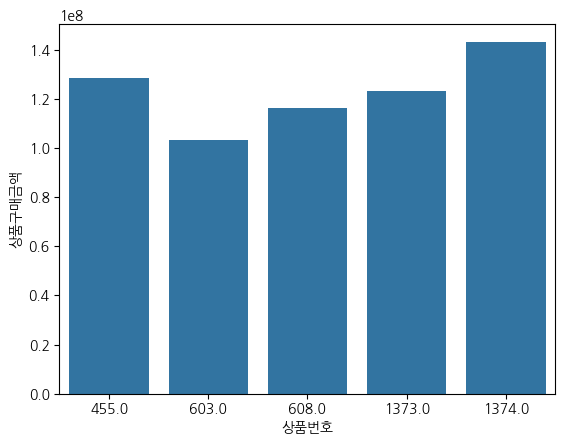

In [ ]:
sns.barplot(data=df_delivery_product_price_top5, x="상품번호", y="상품구매금액")
plt.show()

#### X: 상품번호 / Y : 수량

In [ ]:
df_delivery_product_count = pd.pivot_table(data=df_delivery[["상품번호","수량"]], index='상품번호',values='수량',aggfunc='sum')
df_delivery_product_count.reset_index(inplace=True)
df_delivery_product_count_top5 = df_delivery_product_count.sort_values(by="수량",ascending=False)[:5]
df_delivery_product_count_top5

,상품번호,수량
209,455.0,2295
560,1373.0,2241
561,1374.0,2214
288,608.0,1607
467,1237.0,1577


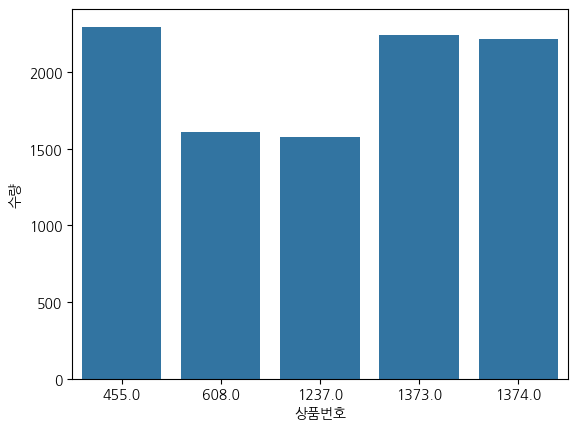

In [ ]:
sns.barplot(data=df_delivery_product_count_top5, x="상품번호", y="수량")
plt.show()

#### X: 결제수단 / Y : 상품구매금액

In [ ]:
df_delivery_pay_price = pd.pivot_table(data=df_delivery[["결제수단","상품구매금액"]], index='결제수단',values='상품구매금액',aggfunc='sum')
df_delivery_pay_price.reset_index(inplace=True)
df_delivery_pay_price_top5 = df_delivery_pay_price.sort_values(by="상품구매금액",ascending=False)[:5]
df_delivery_pay_price_top5

,결제수단,상품구매금액
1,무통장입금,1648386554
27,카드,964388905
18,"적립금,무통장입금",253978716
20,"적립금,카드",96588600
32,"쿠폰,무통장입금",83835150


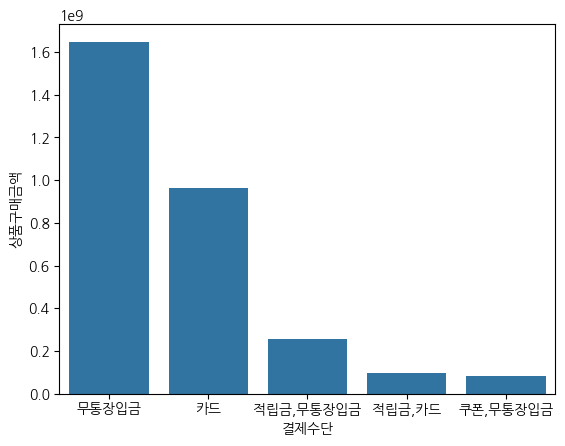

In [ ]:
sns.barplot(data=df_delivery_pay_price_top5, x="결제수단", y="상품구매금액")
plt.show()

#### X: 결제수단 / Y : 수량

In [ ]:
df_delivery_pay_count = pd.pivot_table(data=df_delivery[["결제수단","수량"]], index='결제수단',values='수량',aggfunc='sum')
df_delivery_pay_count.reset_index(inplace=True)
df_delivery_pay_count_top5 = df_delivery_pay_count.sort_values(by="수량",ascending=False)[:5]
df_delivery_pay_count_top5

,결제수단,수량
1,무통장입금,28267
27,카드,16218
18,"적립금,무통장입금",4133
20,"적립금,카드",1562
35,"쿠폰,카드",1464


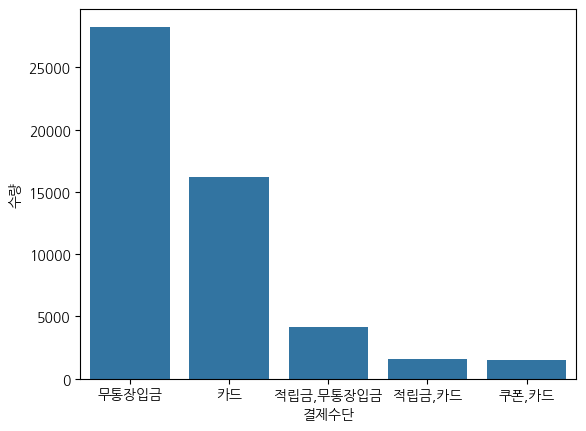

In [ ]:
sns.barplot(data=df_delivery_pay_count_top5, x="결제수단", y="수량")
plt.show()

#### X: 주문경로 / Y : 상품구매금액

In [ ]:
df_delivery_order_price = pd.pivot_table(data=df_delivery[["주문경로","상품구매금액"]], index='주문경로',values='상품구매금액',aggfunc='sum')
df_delivery_order_price.reset_index(inplace=True)
df_delivery_order_price = df_delivery_order_price.sort_values(by="상품구매금액",ascending=False)
df_delivery_order_price

,주문경로,상품구매금액
0,PC쇼핑몰,1756650465
2,모바일웹,1278260260
1,네이버 페이,207980660


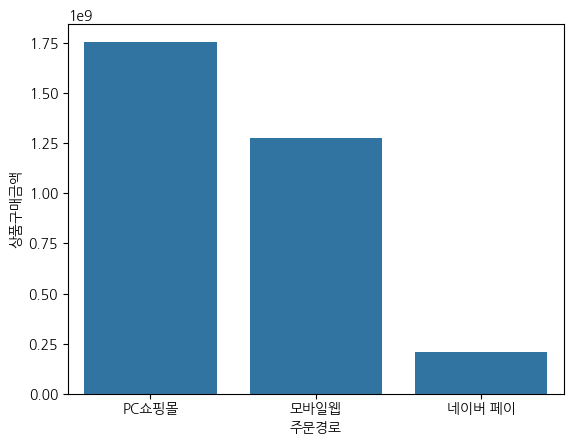

In [ ]:
sns.barplot(data=df_delivery_order_price, x="주문경로", y="상품구매금액")
plt.show()

#### X: 주문경로 / Y : 수량

In [ ]:
df_delivery_order_count = pd.pivot_table(data=df_delivery[["주문경로","수량"]], index='주문경로',values='수량',aggfunc='sum')
df_delivery_order_count.reset_index(inplace=True)
df_delivery_order_count = df_delivery_order_count.sort_values(by="수량",ascending=False)
df_delivery_order_count

,주문경로,수량
0,PC쇼핑몰,30292
2,모바일웹,21713
1,네이버 페이,3057


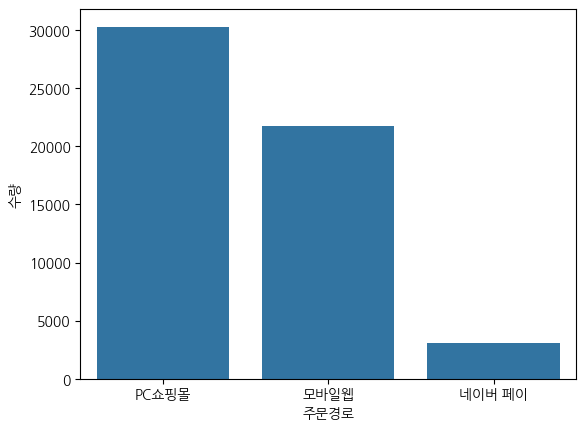

In [ ]:
sns.barplot(data=df_delivery_order_count, x="주문경로", y="수량")
plt.show()

### X: 연속 / Y : 연속

#### X : 상품구매금액 / Y : 수량

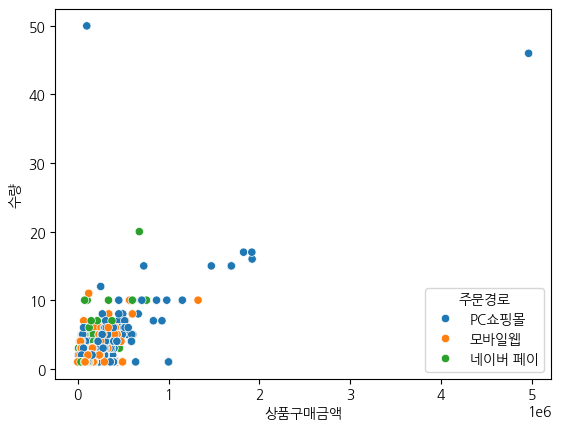

In [ ]:
sns.scatterplot(data=df_delivery,x='상품구매금액',y='수량', hue="주문경로")
plt.show()

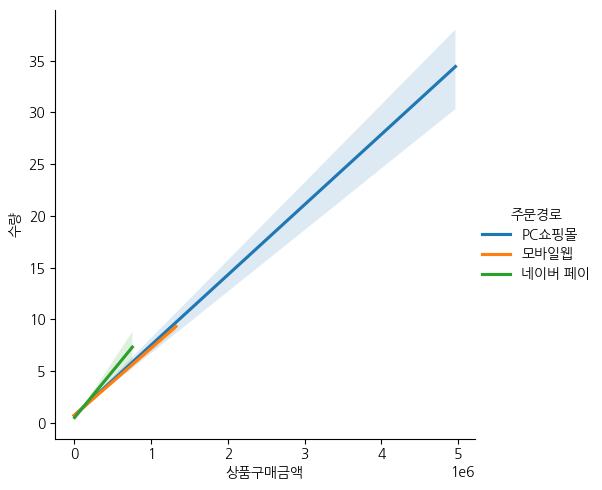

In [ ]:
sns.lmplot(data=df_delivery,x='상품구매금액',y='수량', hue="주문경로",scatter=False)
plt.show()

### X: 시간(순서) / Y : 연속

#### X: 주문일 / Y : 상품구매금액

In [ ]:
df_delivery_orderdate_price = pd.pivot_table(data=df_delivery[["주문일","상품구매금액"]], index='주문일',values='상품구매금액',aggfunc='sum')
df_delivery_orderdate_price.reset_index(inplace=True)
df_delivery_orderdate_price = df_delivery_orderdate_price.sort_values(by="주문일",ascending=True)
df_delivery_orderdate_price

,주문일,상품구매금액
0,2017-01-01,66500
1,2017-01-15,17000
2,2017-01-18,73700
3,2017-01-23,17000
4,2017-02-02,72000
...,...,...
677,2019-01-26,3697660
678,2019-01-27,5019560
679,2019-01-28,33765540
680,2019-01-29,16334270


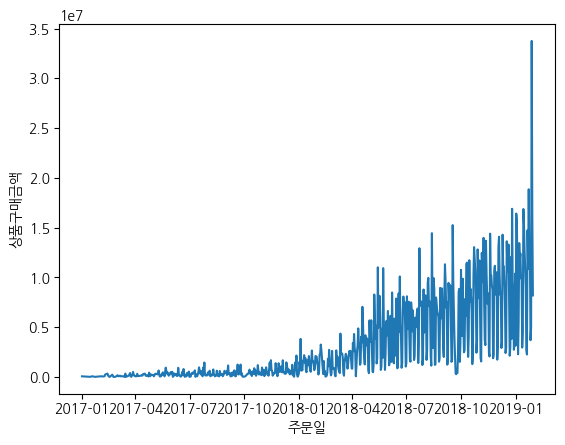

In [ ]:
sns.lineplot(data = df_delivery_orderdate_price, x = '주문일', y='상품구매금액', estimator = sum)
plt.show()

#### X: 주문일 / Y : 수량

In [ ]:
df_delivery_orderdate_count = pd.pivot_table(data=df_delivery[["주문일","수량"]], index='주문일',values='수량',aggfunc='sum')
df_delivery_orderdate_count.reset_index(inplace=True)
df_delivery_orderdate_count = df_delivery_orderdate_count.sort_values(by="주문일",ascending=True)
df_delivery_orderdate_count

,주문일,수량
0,2017-01-01,1
1,2017-01-15,1
2,2017-01-18,1
3,2017-01-23,1
4,2017-02-02,1
...,...,...
677,2019-01-26,46
678,2019-01-27,62
679,2019-01-28,437
680,2019-01-29,211


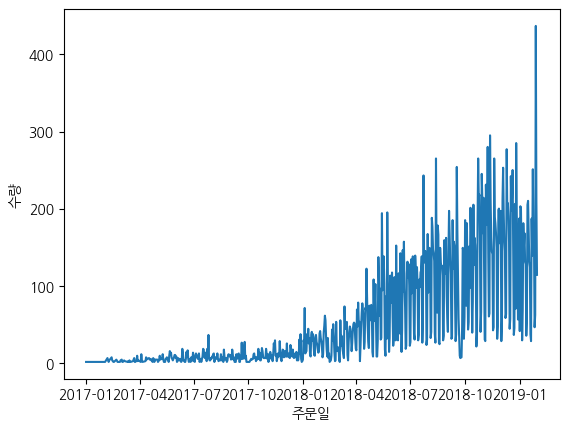

In [ ]:
sns.lineplot(data = df_delivery_orderdate_count, x = '주문일', y='수량', estimator = sum)
plt.show()

## 상관관계


In [ ]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32600 entries, 0 to 46748
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   결제수단         32600 non-null  object        
 1   배송번호         32600 non-null  object        
 2   배송시작일        32600 non-null  datetime64[ns]
 3   배송완료일        32600 non-null  datetime64[ns]
 4   상품구매금액       32600 non-null  int64         
 5   상품번호         32512 non-null  float64       
 6   수량           32600 non-null  int64         
 7   주문경로         32600 non-null  object        
 8   주문일          32600 non-null  datetime64[ns]
 9   배송시작일_month  32600 non-null  object        
 10  배송완료일_month  32600 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(5)
memory usage: 3.0+ MB


In [ ]:
df_delivery[['상품구매금액','상품번호','수량']].corr()

,상품구매금액,상품번호,수량
상품구매금액,1.000000,-0.118786,0.654680
상품번호,-0.118786,1.000000,-0.014762
수량,0.654680,-0.014762,1.000000


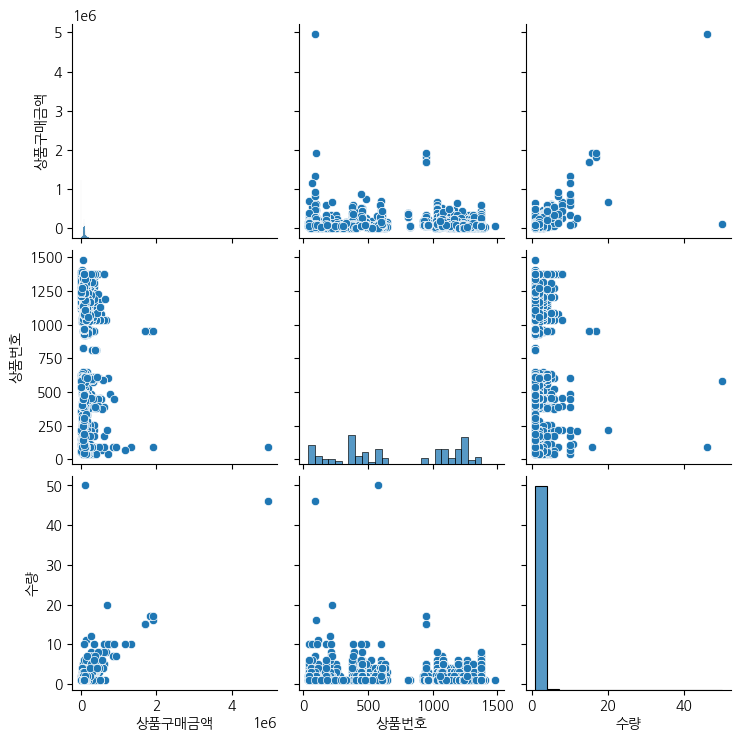

In [ ]:
sns.pairplot(data=df_delivery[['상품구매금액','상품번호','수량']])
plt.show()